## Business Case :- Auto Price Prediction

### Problem Statement

***Task 1 :-*** Prepare a complete data analysis report on the given data.

***Task 2 :-*** Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('auto_imports.csv')

In [3]:
pd.set_option('display.max_columns',None)
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
## rename the column names
data.rename(columns={'3': 'symboling',
                    '?': 'normalized-losses',
                    'alfa-romero':'make',
                    'gas':'fuel-type',
                    'std':'aspiration',
                    'two':'num-of-doors',
                    'convertible':'body-style',
                    'rwd':'drive-wheels',
                    'front':'engine-location',
                    '88.60':'wheel-base',
                    '168.80':'length',
                    '64.10':'width',
                    '48.80':'height',
                    '2548':'curb-weight',
                    'dohc':'engine-type',
                    'four':'num-of-cylinders',
                    '130':'engine-size',
                    'mpfi':'fuel-system',
                    '3.47':'bore',
                    '2.68':'stroke',
                    '9.00':'compression-ratio',
                    '111':'horsepower',
                    '5000':'peak-rpm',
                    '21':'city-mpg',
                    '27':'highway-mpg',
                    '13495':'Price'},inplace=True)

In [5]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
## basic check 

In [7]:
data.shape

(200, 26)

In [8]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'Price'],
      dtype='object')

In [9]:
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
Price                185
dtype: int64

In [10]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [11]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [12]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
Price                0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [15]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [16]:
num_col = data.select_dtypes(include=['int','float'])
num_col.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'Price'],
      dtype='object')

In [17]:
cat_col = data.select_dtypes(include='O')
cat_col.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

In [18]:
for i in cat_col:
    print(i,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('______________________________________________________________________________')

normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
normalized-losses
?      36
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
______________________________________________________________________________
make ['alfa-romero' 'audi' 'bmw' 'chev

# Exploratory Data Analysis

## Univariate analysis using sweetviz

In [4]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


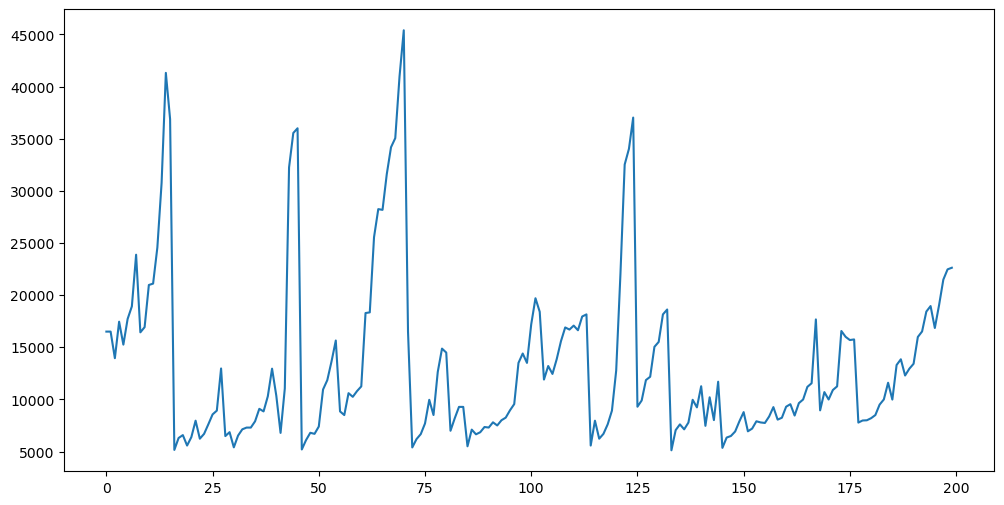

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data['Price'])

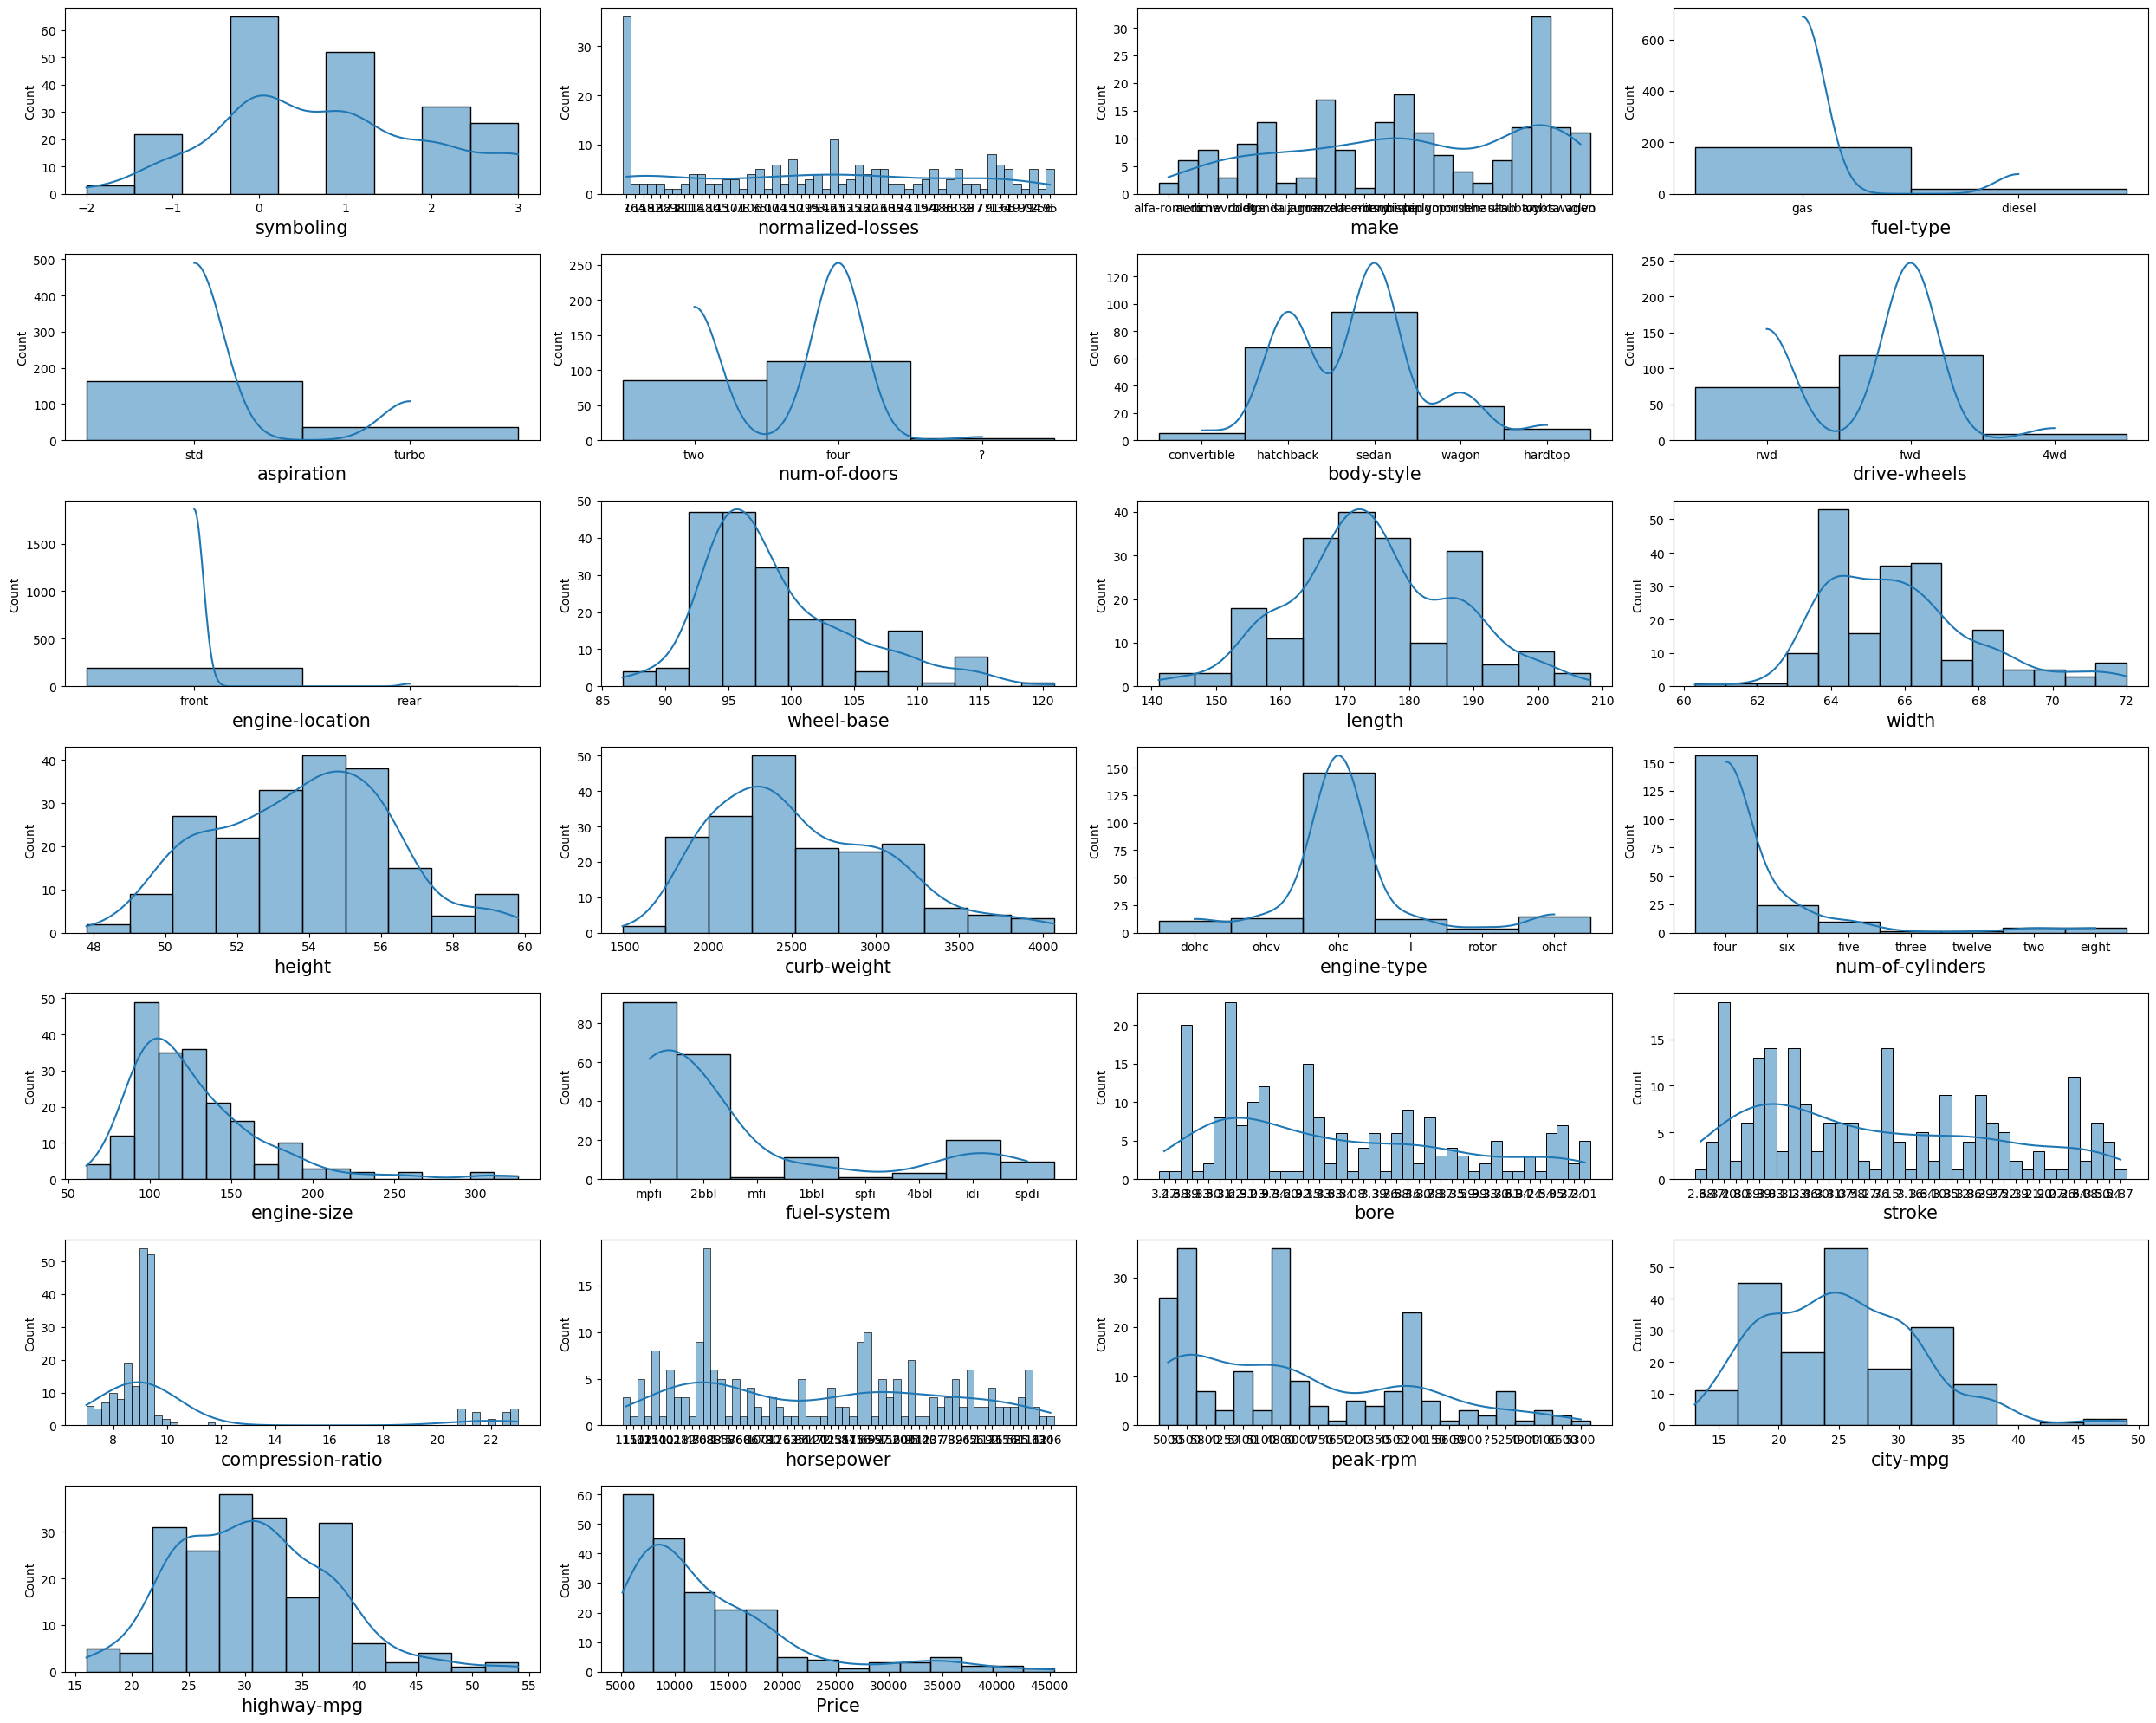

In [20]:
## visualiza the data
plt.figure(figsize=(25,20))
plotnumber = 1
for i in data:
    if plotnumber<=26:
        ax = plt.subplot(7,4,plotnumber)
        sns.histplot(x=data[i],kde=True)
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
        

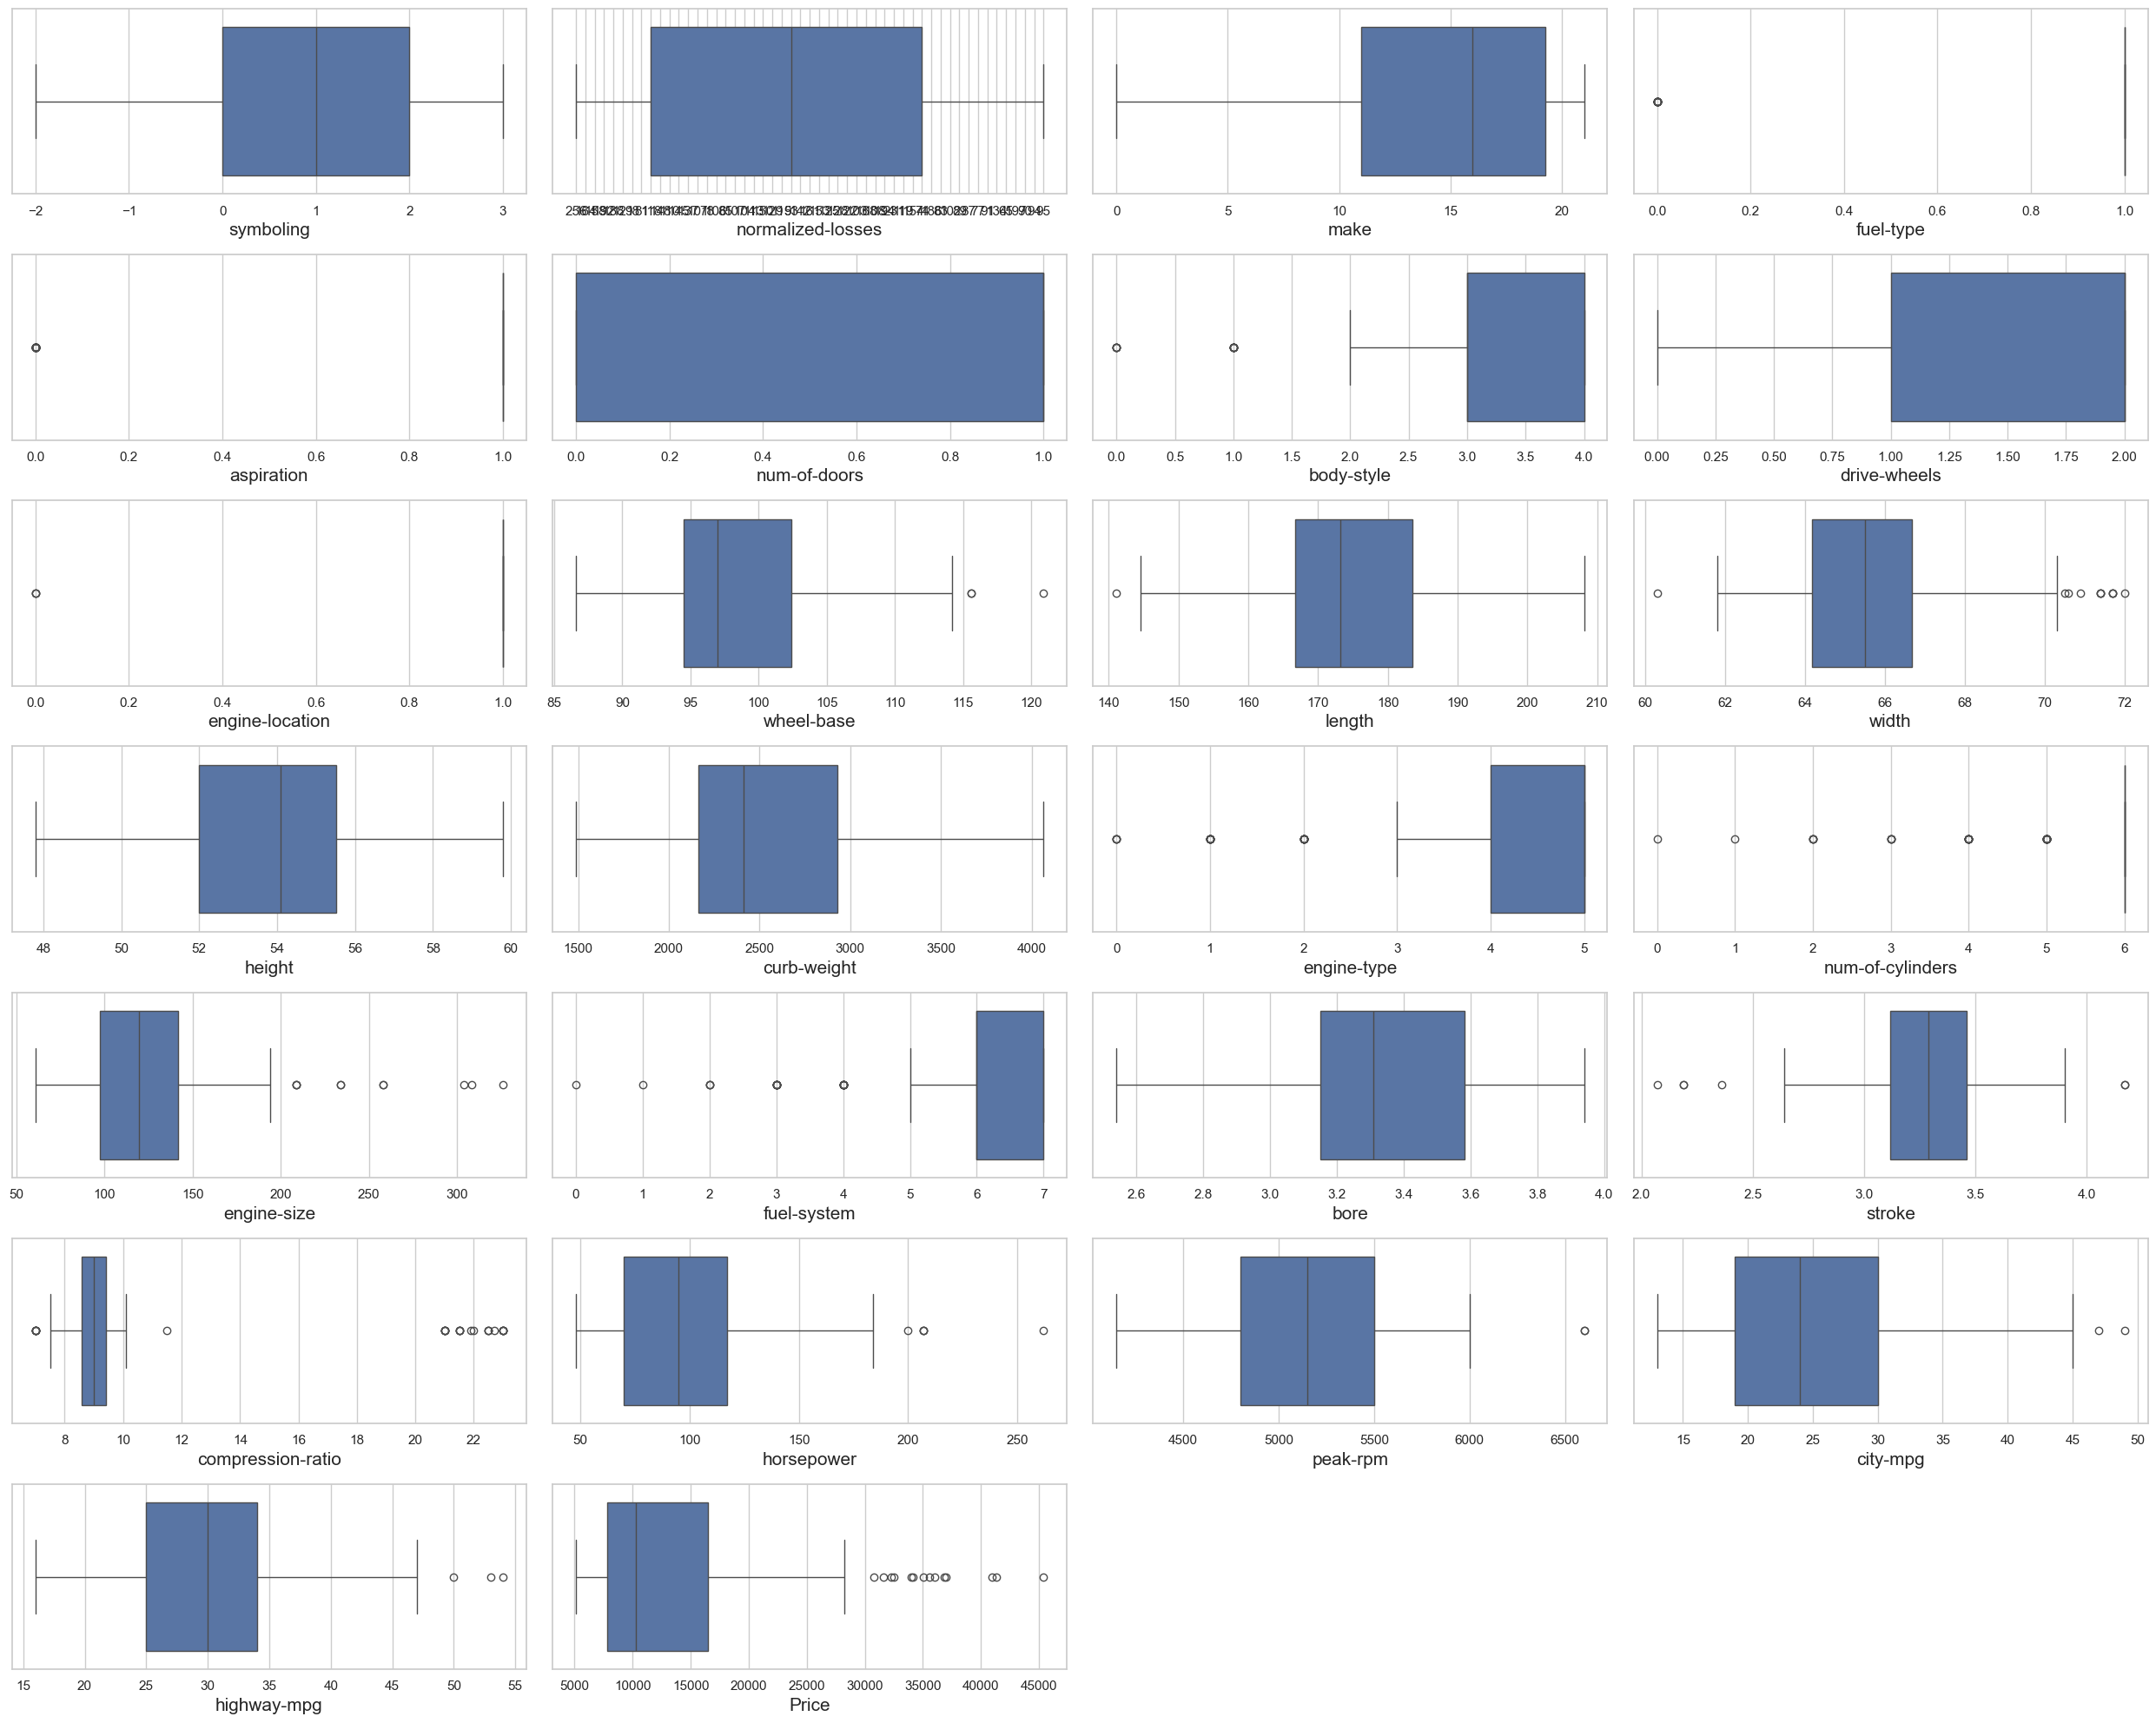

In [104]:
## visualiza the data
plt.figure(figsize=(25,20))
plotnumber = 1
for i in data:
    if plotnumber<=26:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
        

In [22]:
## leable encoding

In [23]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [24]:
data['normalized-losses'].value_counts()

normalized-losses
?      36
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [25]:
data['normalized-losses'] = data['normalized-losses'].replace('?', '256')

In [26]:
data.make.value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: count, dtype: int64

In [27]:
data.make = data.make.map({'toyota': 21,
                           'nissan': 20,
                           'mazda': 19,
                           'mitsubishi': 18,
                           'honda': 17,
                           'volkswagen': 16,
                           'subaru': 15,
                           'peugot': 14,
                           'volvo': 13,
                           'dodge': 12,
                           'mercedes-benz': 11,
                           'bmw': 10,
                           'plymouth': 9,
                           'audi': 8,
                           'saab': 7,
                           'porsche': 6,
                           'jaguar': 5,
                           'chevrolet': 4,
                           'isuzu': 3,
                           'renault': 2,
                           'alfa-romero': 1,
                           'mercury': 0})

In [28]:
## fuel-type
data['fuel-type'].value_counts()

fuel-type
gas       180
diesel     20
Name: count, dtype: int64

In [29]:
data['fuel-type'] = data['fuel-type'].map({'gas':1,'diesel':0})

In [30]:
## aspiration
data.aspiration.value_counts()

aspiration
std      164
turbo     36
Name: count, dtype: int64

In [31]:
data.aspiration = data.aspiration.map({'std':1,'turbo':0})

In [32]:
## num-of-doors
data['num-of-doors'].value_counts()

num-of-doors
four    113
two      85
?         2
Name: count, dtype: int64

In [33]:
data['num-of-doors'] = data['num-of-doors'].replace('?', 'four')

In [34]:
data['num-of-doors'] = data['num-of-doors'].map({'four':1,'two':0})

In [35]:
data['num-of-doors'].value_counts()

num-of-doors
1    115
0     85
Name: count, dtype: int64

In [36]:
# body-style
data['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: count, dtype: int64

In [37]:
data['body-style'] = data['body-style'].map({'sedan':4,'hatchback':3,'wagon':2,
                                             'hardtop':1,'convertible':0})

In [38]:
## drive-wheels
data['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [39]:
data['drive-wheels'] = data['drive-wheels'].map({'fwd':2,'rwd':1,'4wd':0})

In [40]:
## engine-location
data['engine-location'].value_counts()

engine-location
front    197
rear       3
Name: count, dtype: int64

In [41]:
data['engine-location'] = data['engine-location'].map({'front':1,'rear':0})

In [42]:
## engine-type
data['engine-type'].value_counts()

engine-type
ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: count, dtype: int64

In [43]:
data['engine-type'] = data['engine-type'].map({'ohc':5,'ohcf':4,'ohcv':3,'l':2,'dohc':1,'rotor':0})

In [44]:
## num-of-cylinders
data['num-of-cylinders'].value_counts()

num-of-cylinders
four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [45]:
data['num-of-cylinders'] = data['num-of-cylinders'].map({'four':6,'six':5,'five':4,'two':3,'eight':2,
                                               'three':1,'twelve':0})

In [46]:
## fuel-system
data['fuel-system'].value_counts()

fuel-system
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [47]:
data['fuel-system'] = data['fuel-system'].map({'mpfi':7,'2bbl':6,'idi':5,'1bbl':4,'spdi':3,'4bbl':2,
                                               'mfi':1,'spfi':0})

In [48]:
## peak-rpm
data['peak-rpm'].value_counts()

peak-rpm
5500    36
4800    36
5000    26
5200    23
5400    11
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
?        2
6600     2
4650     1
5600     1
4900     1
5300     1
Name: count, dtype: int64

In [49]:
data['peak-rpm'] = data['peak-rpm'].replace('?', '4400')

In [50]:
## bore
data['bore'].value_counts()

bore
3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.70     5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.24     2
3.63     2
3.50     2
3.80     2
3.33     2
3.08     1
3.94     1
3.13     1
2.54     1
2.99     1
3.61     1
3.34     1
3.60     1
2.92     1
3.76     1
2.68     1
3.47     1
Name: count, dtype: int64

In [51]:
data['bore'] = data['bore'].replace('?', '3.35')

In [52]:
## stroke
data['stroke'].value_counts()

stroke
3.40    19
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.27     6
3.19     6
3.41     6
3.07     6
3.58     6
3.50     6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.90     3
3.11     3
2.90     3
3.10     2
4.17     2
2.80     2
2.19     2
3.08     2
2.36     1
2.68     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: count, dtype: int64

In [53]:
data['stroke'] = data['stroke'].replace('?', '3.47')

In [54]:
## horsepower
data['horsepower'].value_counts()

horsepower
68     19
69     10
116     9
70      9
110     8
95      7
114     6
101     6
62      6
88      6
145     5
82      5
76      5
97      5
160     5
102     5
84      5
123     4
86      4
92      4
207     3
73      3
111     3
90      3
152     3
85      3
182     3
121     3
56      2
112     2
94      2
156     2
?       2
52      2
162     2
161     2
155     2
176     2
184     2
100     2
55      1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
262     1
200     1
135     1
64      1
120     1
72      1
154     1
143     1
142     1
175     1
106     1
Name: count, dtype: int64

In [55]:
data['horsepower'] = data['horsepower'].replace('?', '156')

In [56]:
## change the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    int64  
 3   fuel-type          200 non-null    int64  
 4   aspiration         200 non-null    int64  
 5   num-of-doors       200 non-null    int64  
 6   body-style         200 non-null    int64  
 7   drive-wheels       200 non-null    int64  
 8   engine-location    200 non-null    int64  
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    int64  
 15  num-of-cylinders   200 non-null    int64  
 16  engine-size        200 non

In [57]:
# data['normalized-losses'] = data['normalized-losses'].astype('int')
data['bore'] = data['bore'].astype('float')
data['stroke'] = data['stroke'].astype('float')
data['horsepower'] = data['horsepower'].astype('int')
data['peak-rpm'] = data['peak-rpm'].astype('int')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    int64  
 3   fuel-type          200 non-null    int64  
 4   aspiration         200 non-null    int64  
 5   num-of-doors       200 non-null    int64  
 6   body-style         200 non-null    int64  
 7   drive-wheels       200 non-null    int64  
 8   engine-location    200 non-null    int64  
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    int64  
 15  num-of-cylinders   200 non-null    int64  
 16  engine-size        200 non

<Axes: >

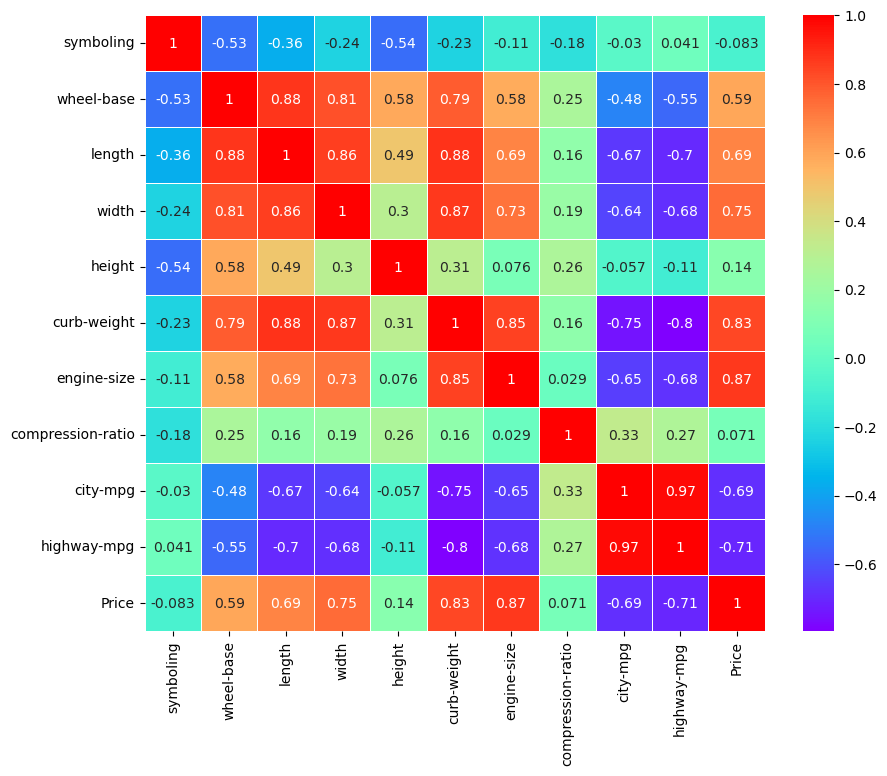

In [59]:
## check corr-relaction 
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot=True,linewidth=0.5,cmap='rainbow')

In [60]:
## Model Creation 
data1 = data.copy()

In [61]:
## Scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data1[['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']] = scale.fit_transform(data1[['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']])

In [62]:
data1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,1.742368,1.812780,-2.601036,0.333333,0.468521,-1.163160,-3.283429,-0.961074,0.123404,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,-2.485130,0.425161,0.075578,0.765199,0.521081,-1.855492,-0.292224,0.188591,-0.229646,-0.654574,-0.544042,16500
1,0.136499,1.812780,-2.601036,0.333333,0.468521,-1.163160,-0.195565,-0.961074,0.123404,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,-0.976705,-0.599323,0.605109,0.765199,-2.427730,0.654291,-0.292224,1.328357,-0.229646,-0.966276,-0.690882,16500
2,0.939433,0.294981,-1.286908,0.333333,0.468521,0.859727,0.833723,0.786334,0.123404,0.158057,0.192591,0.143971,0.209918,-0.422785,0.531720,0.425161,-0.429882,0.765199,-0.524067,0.431905,-0.042481,-0.049964,0.804797,-0.187021,-0.103522,13950
3,0.939433,0.294981,-1.286908,0.333333,0.468521,0.859727,0.833723,-2.708483,0.123404,0.091646,0.192591,0.239316,0.209918,0.518648,0.531720,-1.623806,0.219996,0.765199,-0.524067,0.431905,-0.541967,0.294616,0.804797,-1.122127,-1.278241,17450
4,0.939433,1.812780,-1.286908,0.333333,0.468521,-1.163160,0.833723,0.786334,0.123404,0.158057,0.249427,0.191644,-0.285464,-0.094153,0.531720,-1.623806,0.219996,0.765199,-0.524067,0.431905,-0.417096,0.162085,0.804797,-0.966276,-0.837722,15250


In [63]:
## Create X and y
X = data1.drop('Price',axis=1)
y = data.Price

In [64]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.742368,1.812780,-2.601036,0.333333,0.468521,-1.163160,-3.283429,-0.961074,0.123404,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,-2.485130,0.425161,0.075578,0.765199,0.521081,-1.855492,-0.292224,0.188591,-0.229646,-0.654574,-0.544042
1,0.136499,1.812780,-2.601036,0.333333,0.468521,-1.163160,-0.195565,-0.961074,0.123404,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,-0.976705,-0.599323,0.605109,0.765199,-2.427730,0.654291,-0.292224,1.328357,-0.229646,-0.966276,-0.690882
2,0.939433,0.294981,-1.286908,0.333333,0.468521,0.859727,0.833723,0.786334,0.123404,0.158057,0.192591,0.143971,0.209918,-0.422785,0.531720,0.425161,-0.429882,0.765199,-0.524067,0.431905,-0.042481,-0.049964,0.804797,-0.187021,-0.103522
3,0.939433,0.294981,-1.286908,0.333333,0.468521,0.859727,0.833723,-2.708483,0.123404,0.091646,0.192591,0.239316,0.209918,0.518648,0.531720,-1.623806,0.219996,0.765199,-0.524067,0.431905,-0.541967,0.294616,0.804797,-1.122127,-1.278241
4,0.939433,1.812780,-1.286908,0.333333,0.468521,-1.163160,0.833723,0.786334,0.123404,0.158057,0.249427,0.191644,-0.285464,-0.094153,0.531720,-1.623806,0.219996,0.765199,-0.524067,0.431905,-0.417096,0.162085,0.804797,-0.966276,-0.837722


In [65]:
y.head()

0    16500
1    16500
2    13950
3    17450
4    15250
Name: Price, dtype: int64

In [66]:
## split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=14)

In [67]:
X_train.shape

(160, 25)

In [68]:
y_test.shape

(40,)

In [69]:
## check metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

In [70]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [72]:
r2_score(y_test,dt_predict)

0.9573808658248656

In [73]:
MSE = mean_squared_error(y_test,dt_predict)
print(f'MSE:{MSE}')

MSE:4629918.979832767


In [74]:
MAE = mean_absolute_error(y_test,dt_predict)
print(f'MAE:{MAE}')

MAE:1606.2613095238096


In [75]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


In [76]:
r2_score(y_test,rf_pred)

0.928068882644663

In [77]:
mean_squared_error(y_test,rf_pred)

7814218.940148194

In [78]:
mean_absolute_error(y_test,rf_pred)

1826.9416666666668

In [79]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.84307711 0.63926279 0.72446117]
Cross validation Score: 0.7356003566344688
Std : 0.08357882444659538


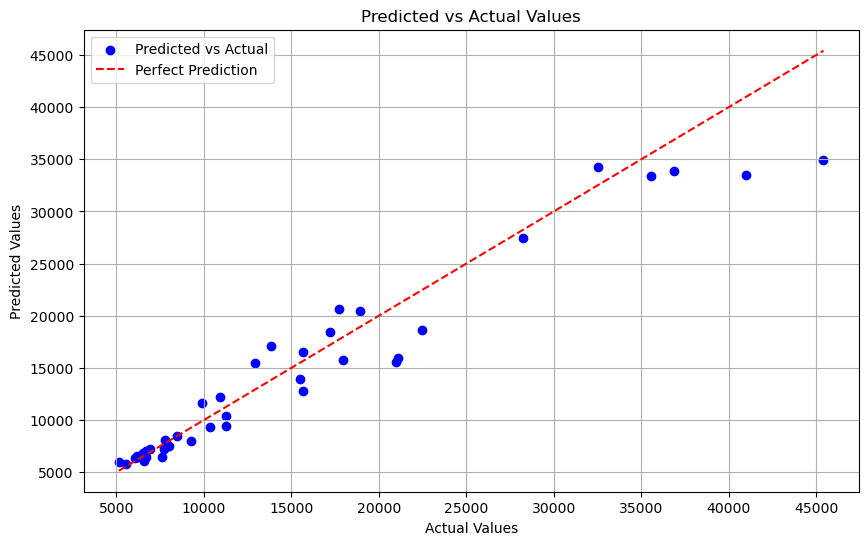

In [80]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [81]:
## Search Best Paramaters for My Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf2 = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 13, 'bootstrap': False}


In [82]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=300,min_samples_split=3,min_samples_leaf=2,max_features='log2',max_depth=14,bootstrap=False)
rf2.fit(X_train,y_train)
rf_pred2 = rf.predict(X_test)


In [83]:
r2_score(y_test,rf_pred2)

0.928068882644663

In [84]:
mean_squared_error(y_test,rf_pred2)

7814218.940148194

In [85]:
mean_absolute_error(y_test,rf_pred2)

1826.9416666666668

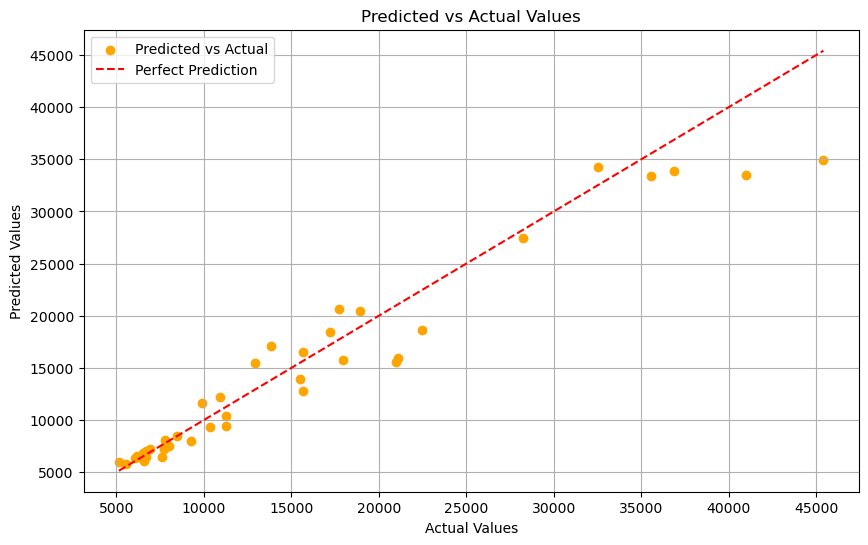

In [86]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred2, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [87]:
## XGB
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [88]:
r2_score(y_test,xgb_pred)

0.9329570035616231

In [89]:
mean_squared_error(y_test,xgb_pred)

7283199.1471099015

In [90]:
mean_absolute_error(y_test,xgb_pred)

1731.091845703125

In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=250,
                   learning_rate=0.06,
                   max_depth=8,
                   min_child_weight=4,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.001,
                   reg_alpha=0.1,
                   reg_lambda=1.5,
                   verbosity=2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print('r2_score:',r2_score(y_test,xgb_pred))
print('MSE:',mean_squared_error(y_test,xgb_pred))
print('MAE:',mean_absolute_error(y_test,xgb_pred))


r2_score: 0.9383556715529542
MSE: 6696716.200361949
MAE: 1737.1270385742187


In [92]:
## Bagging
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)


In [93]:
r2_score(y_test,bagg_pred)

0.9319921954711102

In [94]:
mean_absolute_error(y_test,bagg_pred)

1744.1320833333339

In [95]:
mean_squared_error(y_test,bagg_pred)

7388010.832673614

In [96]:
## KNN 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('r2_score:',r2_score(y_test,knn_pred))
print('MSE:',mean_squared_error(y_test,knn_pred))
print('MAE:',mean_absolute_error(y_test,knn_pred))

r2_score: 0.9373996728477572
MSE: 6800570.880555557
MAE: 1668.0583333333336


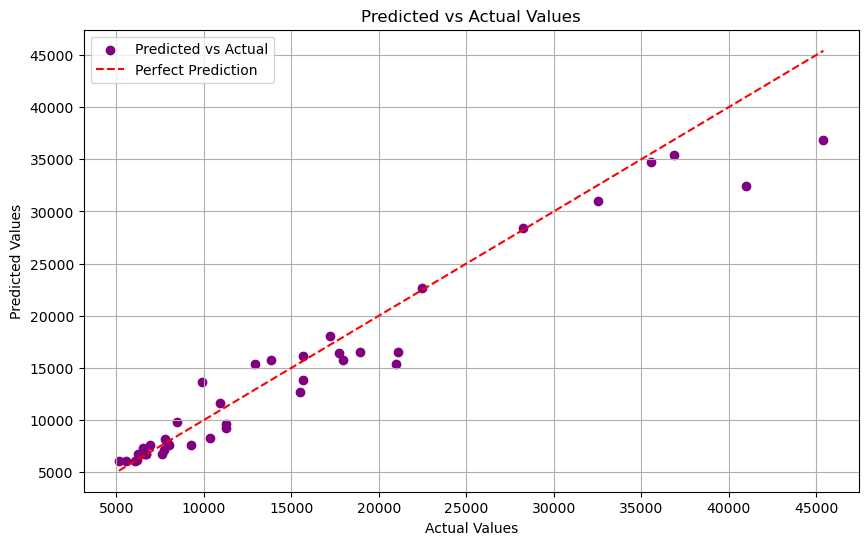

In [97]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_pred, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('r2_score:',r2_score(y_test,GB_pred))
print('MSE:',mean_squared_error(y_test,GB_pred))
print('MSE:',mean_absolute_error(y_test,GB_pred))

r2_score: 0.9495806688340406
MSE: 5477291.428692264
MSE: 1639.0678215448734


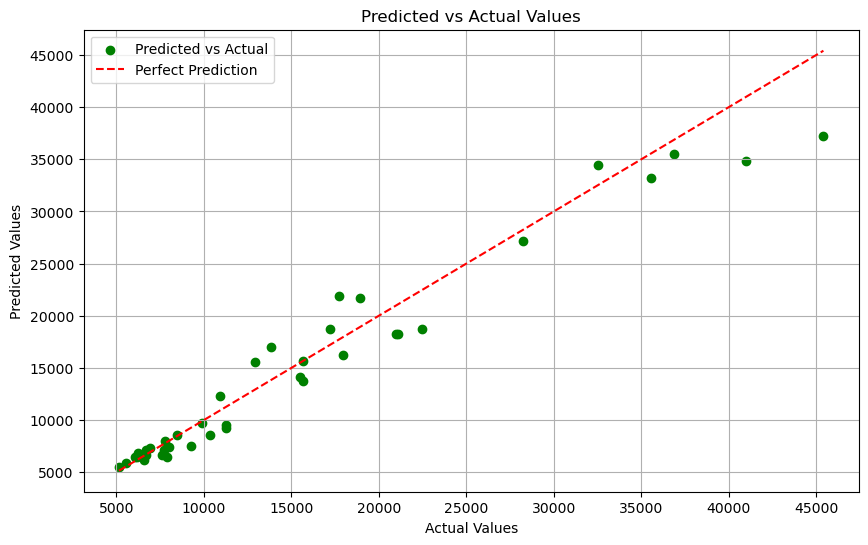

In [99]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

## Model Comparison

In [101]:
df = pd.DataFrame()
df['Model']=['Decision Tree','Random Forest','Random Forest Hyperparameter','XGB','XGB Hyperparameter','Bagging','KNN','GradientBoostingRegressor']
df['r2_score'] = [95,93,93,93,93,93,93,94]
df['MAE'] = [1700,1718,1718,1731,7137,1604,1668,1660]

In [102]:
df

,Model,r2_score,MAE
0,Decision Tree,95,1700
1,Random Forest,93,1718
2,Random Forest Hyperparameter,93,1718
3,XGB,93,1731
4,XGB Hyperparameter,93,7137
5,Bagging,93,1604
6,KNN,93,1668
7,GradientBoostingRegressor,94,1660


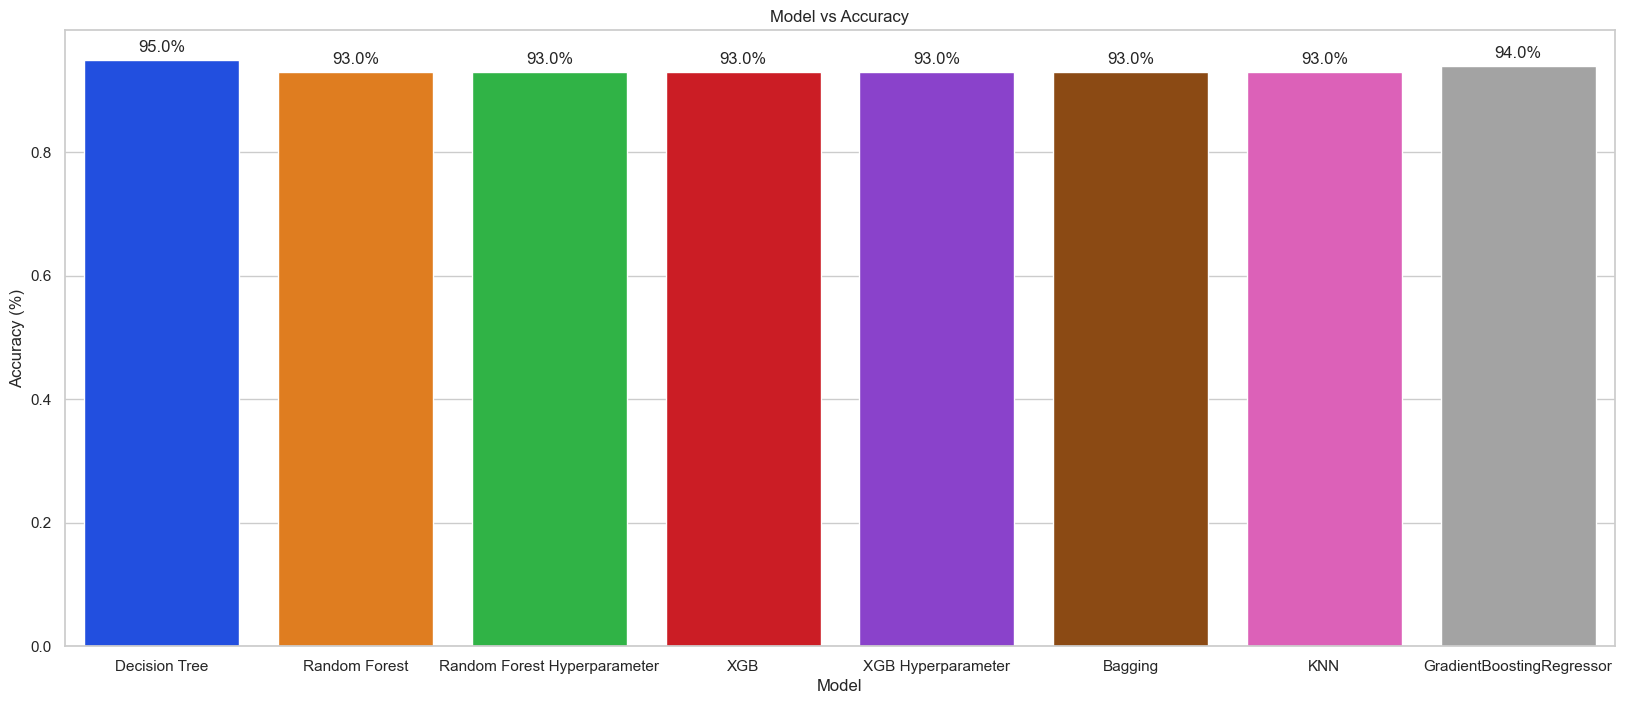

In [103]:
## Visualization 

df = pd.DataFrame()
df['Model']=['Decision Tree','Random Forest','Random Forest Hyperparameter','XGB','XGB Hyperparameter','Bagging','KNN','GradientBoostingRegressor']
df['r2_score'] = [0.95,0.93,0.93,0.93,0.93,0.93,0.93,0.94]



# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='r2_score', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()
